In [23]:
import pypsa 
import xarray as xr
import atlite
import pandas as pd
import dill as pickle
import geopandas as gpd
from scipy.spatial import cKDTree
import numpy as np


In [24]:
vmin = 0.17
vmax = 0.33

<Axes: >

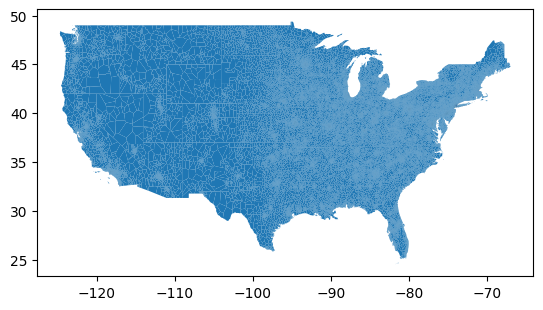

In [25]:
##load geojsonfile
#gdf_shapes = gpd.read_file("/Users/asiazhang/Downloads/regions_onshore.geojson")
gdf_shapes = gpd.read_file("/Users/asiazhang/Local Docs/pypsa-usa/workflow/resources/Default/usa/Geospatial/regions_onshore.geojson")

# Ensure it's in a projected coordinate reference system (CRS)
gdf_shapes = gdf_shapes.to_crs(epsg=4326)
gdf_shapes.plot()


## Testing Shapes

<Axes: >

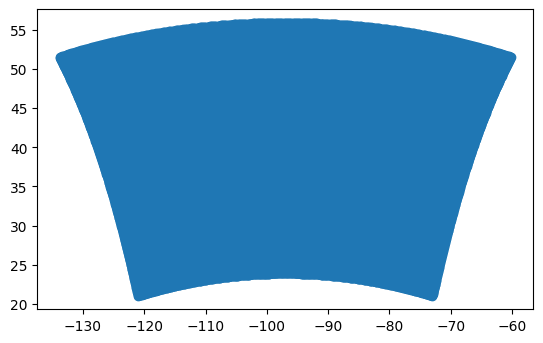

In [4]:
##create list of coordinates from ds to load into a geodataframe
coords_list = list(zip(ds.x.values.flatten(), ds.y.values.flatten()))
##convert to geodataframe
df_points = pd.DataFrame(coords_list, columns=["longitude", "latitude"])
gdf_points = gpd.GeoDataFrame(df_points, 
                              geometry=gpd.points_from_xy(df_points.longitude, df_points.latitude), 
                              crs="EPSG:4326")
gdf_points.geometry.plot()

In [9]:
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")

# Filter for the United States
us_map = world[world["ADMIN"] == "United States of America"]

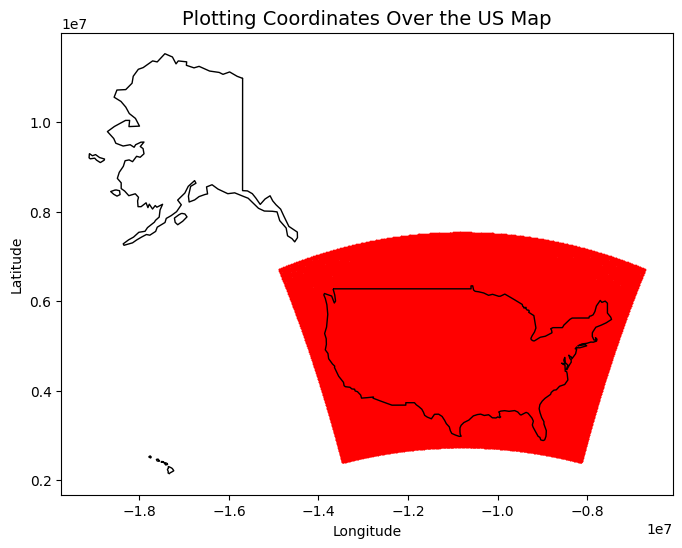

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx


# Convert to Web Mercator (required for adding basemap)
us_map = us_map.to_crs(epsg=3857)
gdf_points = gdf_points.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
us_map.boundary.plot(ax=ax, color="black", linewidth=1)  # Plot US boundaries
gdf_points.plot(ax=ax, color="red", markersize=0.5, edgecolor="red", linewidth=0.5)  # Plot points

# Add basemap
#ctx.add_basemap(ax, source=ctx.providers.Stamen.Terrain, alpha=0.5)

# Add title and labels
ax.set_title("Plotting Coordinates Over the US Map", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


In [154]:
gdf_joined = gpd.sjoin(gdf_points, gdf_shapes, how="right", predicate="within")
#print(gdf_joined[['longitude', 'latitude', 'geometry', 'name']])
gdf_joined

,index_left,longitude,latitude,name,x,y,country,geometry
0,105193.0,-124.646683,47.965832,35000,-124.578,48.2414,p2,"POLYGON ((-124.17042 48.12051, -124.55029 47.8..."
0,105194.0,-124.493683,47.996811,35000,-124.578,48.2414,p2,"POLYGON ((-124.17042 48.12051, -124.55029 47.8..."
0,105195.0,-124.340515,48.027626,35000,-124.578,48.2414,p2,"POLYGON ((-124.17042 48.12051, -124.55029 47.8..."
0,105618.0,-124.539932,48.099224,35000,-124.578,48.2414,p2,"POLYGON ((-124.17042 48.12051, -124.55029 47.8..."
0,105619.0,-124.386536,48.130081,35000,-124.578,48.2414,p2,"POLYGON ((-124.17042 48.12051, -124.55029 47.8..."
...,...,...,...,...,...,...,...,...
4749,95947.0,-111.116089,47.604843,39713,-111.123,47.5699,p18,"POLYGON ((-111.13355 47.79409, -111.08401 47.5..."
4749,96371.0,-111.139954,47.710739,39713,-111.123,47.5699,p18,"POLYGON ((-111.13355 47.79409, -111.08401 47.5..."
4750,96372.0,-110.982544,47.726734,39714,-111.061,47.5817,p18,"POLYGON ((-111.06249 48.01884, -110.82817 47.7..."
4750,96796.0,-111.006226,47.832623,39714,-111.061,47.5817,p18,"POLYGON ((-111.06249 48.01884, -110.82817 47.7..."


/var/folders/51/g6s5m1bd6ts2821wgq17c8600000gn/T/ipykernel_3382/3424759611.py:14: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



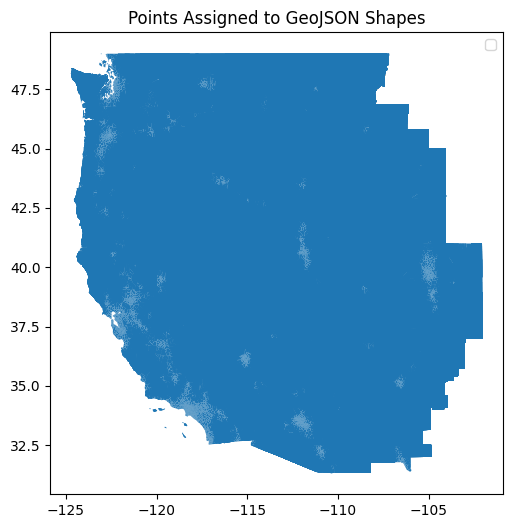

In [155]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the polygons (GeoJSON shapes)
#gdf_shapes.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)

# Plot the points
#gdf_points.plot(ax=ax, marker='o', color='red', markersize=5)

gdf_joined.plot(ax=ax)

# Add legend
plt.legend()
plt.title("Points Assigned to GeoJSON Shapes")
plt.show()

## Plot California Existing PyPSA Data

In [ ]:
solar = xr.open_dataset('/Users/asiazhang/Downloads/profile_onwind.nc')

In [147]:
df_solar = solar['profile'].to_dataframe().reset_index()
df_solar_avg = df_solar.groupby('bus').mean()

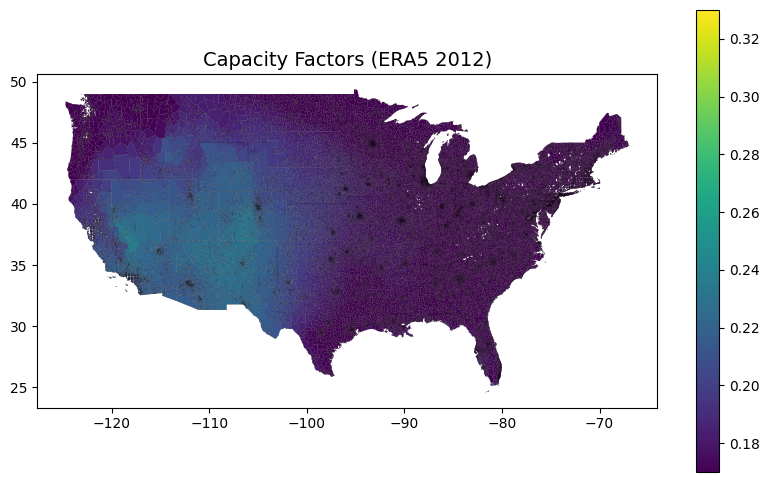

In [148]:
## plot of existing pypsa data
solar_gdf_shapes = gdf_shapes.merge(df_solar_avg, left_on="name", right_on="bus", how="left") #merging geoshapes to CFs
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the shapes with capacity factor as color
solar_gdf_shapes.plot(ax=ax, column="profile", cmap="viridis", legend=True, edgecolor="black", linewidth = 0.1, vmin=vmin, vmax=vmax)

ax.set_title("Capacity Factors (ERA5 2012)", fontsize=14)  # Set plot title
plt.show()

# Plot GODEEP

In [26]:
#ds = xr.open_dataset('/Users/asiazhang/Downloads/solar_rcp85hotter_2020_2059/solar_gen_cf_2055.nc')
ds = xr.open_dataset('/Users/asiazhang/solar_rcp45hotter_2020_2059/solar_gen_cf_2059.nc')

## convert Time to [datetime64] type
ds["Time"] = pd.to_datetime(ds["Time"].values, unit="ns").astype("datetime64[ns]")
ds["Time"].values
## Renaming columns in ds.coords
ds = ds.rename({"Time": "time", "XLONG": "x", "XLAT": "y"})

coords_list_gd = list(zip(ds.x.values.flatten(), ds.y.values.flatten(), ds.capacity_factor.mean(dim='time').values.flatten()))
df_points_gd = pd.DataFrame(coords_list_gd, columns=["longitude", "latitude", "capacity_factor"])
gdf_points_gd = gpd.GeoDataFrame(df_points_gd, 
                           geometry=gpd.points_from_xy(df_points_gd.longitude, df_points_gd.latitude), 
                            crs="EPSG:4326")

gdf_joined_gd = gpd.sjoin(gdf_points_gd, gdf_shapes, how="right", predicate="within") #get bus number and shape associated with godeeep coord


In [ ]:
## assign buses with missing CFs the CF of the nearest point
missing_cf = gdf_joined_gd["capacity_factor"].isna()

# Get centroids of geoshapes with missing capacity factor
shape_centroids = gdf_joined_gd.loc[missing_cf, "geometry"].centroid

# Get coordinates of points with valid capacity factor
valid_points = gdf_points_gd.dropna(subset=["capacity_factor"])
point_coords = np.array(list(zip(valid_points.geometry.x, valid_points.geometry.y)))

# Ensure data is in a projected CRS for accurate distance calculations
gdf_shapes_projected = gdf_shapes.to_crs(epsg=3857)
valid_points_projected = valid_points.to_crs(epsg=3857)
shape_centroids_projected = shape_centroids.to_crs(epsg=3857)

# Create KDTree from valid points
tree = cKDTree(np.c_[valid_points_projected.geometry.x, valid_points_projected.geometry.y])

# Find nearest valid point for each missing region
distances, indices = tree.query(np.c_[shape_centroids_projected.x, shape_centroids_projected.y])

# Assign the nearest capacity factor to missing values
gdf_joined_gd.loc[missing_cf, "capacity_factor"] = valid_points.iloc[indices]["capacity_factor"].values

/var/folders/51/g6s5m1bd6ts2821wgq17c8600000gn/T/ipykernel_54679/4226695806.py:5: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




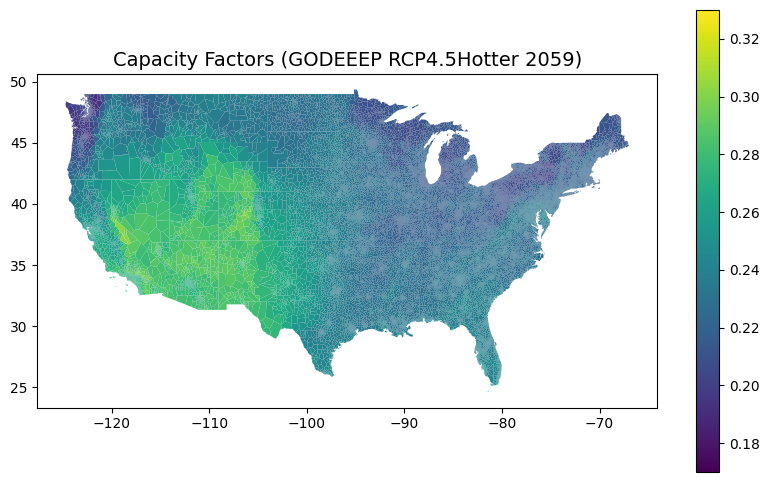

In [28]:
gdf_joined_gd_avg = gdf_joined_gd.groupby('name')['capacity_factor'].mean().reset_index()

solar_gdf_shapes_gd = gdf_shapes.merge(gdf_joined_gd_avg, on="name", how="left")
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the shapes with capacity factor as color
solar_gdf_shapes_gd.plot(ax=ax, column="capacity_factor", cmap="viridis", legend=True, edgecolor='none', vmin=vmin, vmax=vmax)
ax.set_title("Capacity Factors (GODEEEP RCP4.5Hotter 2059)", fontsize=14)  # Set plot title
plt.show()

In [29]:
solar_gdf_shapes_gd

,name,x,y,country,geometry,capacity_factor
0,0,-70.2211,43.9761,p134,"POLYGON ((-70.22833 44.02346, -70.16224 43.963...",0.218152
1,1,-70.3053,44.1010,p134,"POLYGON ((-70.33409 44.07221, -70.3377 44.1348...",0.218834
2,2,-70.1860,44.1799,p134,"POLYGON ((-70.20428 44.17129, -70.21885 44.209...",0.217501
3,3,-70.2241,44.1433,p134,"POLYGON ((-70.22759 44.12822, -70.25093 44.154...",0.218149
4,4,-70.1805,44.0207,p134,"POLYGON ((-70.22833 44.02346, -70.18257 44.057...",0.218152
...,...,...,...,...,...,...
40895,40904,-95.1872,29.4250,p67,"POLYGON ((-95.14368 29.47255, -95.11477 29.435...",0.235877
40896,40905,-95.6032,29.9266,p67,"POLYGON ((-95.56441 29.90169, -95.61525 29.884...",0.233919
40897,40906,-95.5583,28.9606,p67,"POLYGON ((-95.59349 29.0757, -95.48246 28.9738...",0.235383
40898,40907,-95.6154,29.7502,p67,"POLYGON ((-95.64271 29.7792, -95.58677 29.7524...",0.233722


# Testing

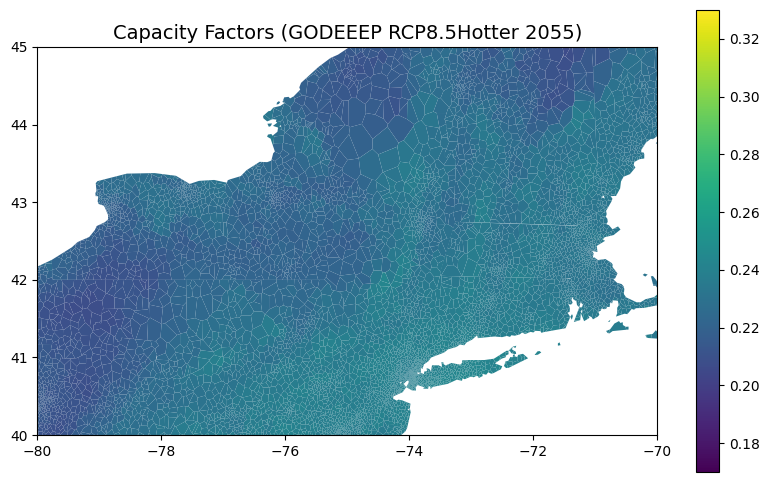

In [130]:
ny_xlim = [-80, -70]  # Longitude range (Western NY to Eastern NY)
ny_ylim = [40, 45]

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the shapes with capacity factor as color
solar_gdf_shapes_gd.plot(
    ax=ax, column="capacity_factor", cmap="viridis",
    legend=True, edgecolor='none', vmin=vmin, vmax=vmax
)

# Set zoomed-in limits
ax.set_xlim(ny_xlim)
ax.set_ylim(ny_ylim)

# Set plot title
ax.set_title("Capacity Factors (GODEEEP RCP8.5Hotter 2055)", fontsize=14)

plt.show()

In [131]:
gdf_joined_gd = gpd.sjoin(gdf_points_gd, gdf_shapes, how="right", predicate="intersects")
gdf_joined_gd["capacity_factor"].nunique()

52880

In [132]:
gdf_joined_gd = gpd.sjoin(gdf_points_gd, gdf_shapes, how="right", predicate="within")

missing_cf = gdf_joined_gd["capacity_factor"].isna()

# Get centroids of geoshapes with missing capacity factor
shape_centroids = gdf_joined_gd.loc[missing_cf, "geometry"].centroid

# Get coordinates of points with valid capacity factor
valid_points = gdf_points_gd.dropna(subset=["capacity_factor"])
point_coords = np.array(list(zip(valid_points.geometry.x, valid_points.geometry.y)))

# Ensure data is in a projected CRS for accurate distance calculations
gdf_shapes_projected = gdf_shapes.to_crs(epsg=3857)
valid_points_projected = valid_points.to_crs(epsg=3857)
shape_centroids_projected = shape_centroids.to_crs(epsg=3857)

# Create KDTree from valid points
tree = cKDTree(np.c_[valid_points_projected.geometry.x, valid_points_projected.geometry.y])

# Find nearest valid point for each missing region
distances, indices = tree.query(np.c_[shape_centroids_projected.x, shape_centroids_projected.y])

# Assign the nearest capacity factor to missing values
gdf_joined_gd.loc[missing_cf, "capacity_factor"] = valid_points.iloc[indices]["capacity_factor"].values
gdf_joined_gd['name']

/var/folders/51/g6s5m1bd6ts2821wgq17c8600000gn/T/ipykernel_1670/3745104231.py:6: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




0            0
1            1
2            2
3            3
4            4
         ...  
40896    40905
40897    40906
40897    40906
40898    40907
40899    40908
Name: name, Length: 73302, dtype: object

In [133]:
gdf_joined_gd_avg = gdf_joined_gd.groupby('name')['capacity_factor'].mean().reset_index()
solar_gdf_shapes_gd = gdf_shapes.merge(gdf_joined_gd_avg, on="name", how="left")

/Users/asiazhang/miniforge3/envs/pypsa-usa/lib/python3.11/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning:

Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.



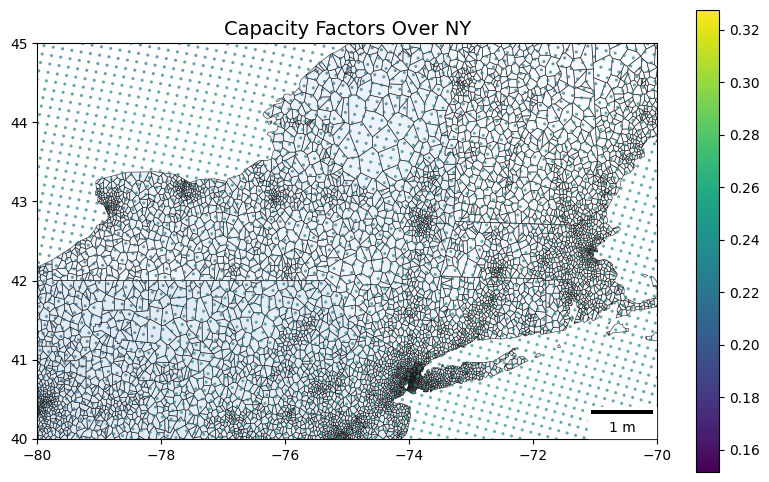

In [134]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the geoshapes (polygons), colored by their capacity factors
gdf_shapes.plot(
    ax=ax, cmap="Blues", legend=True,
    edgecolor="black", linewidth=0.5, alpha=0.7  # Light transparency to see both layers
)

# Plot the capacity factor points on top
gdf_points_gd.plot(
    ax=ax, column="capacity_factor", cmap="viridis", legend=True,
    markersize=5, alpha=0.7, edgecolor="none"
)

ny_xlim = [-80, -70]  # Longitude range (Western NY to Eastern NY)
ny_ylim = [40, 45]

ax.set_xlim(ny_xlim)  # Longitude range
ax.set_ylim(ny_ylim)      # Latitude range
scalebar = ScaleBar(1, location="lower right", units="m", length_fraction=0.1)
ax.add_artist(scalebar)

# Title and labels
ax.set_title("Capacity Factors Over NY", fontsize=14)

plt.show()

In [135]:
from matplotlib_scalebar.scalebar import ScaleBar


In [136]:
n = pypsa.Network('/Users/asiazhang/Local Docs/pypsa-usa/workflow/resources/Tutorial/western/elec_base_network_l_pp.nc')

INFO:pypsa.io:Imported network elec_base_network_l_pp.nc has buses, carriers, generators, lines, line_types, links, loads, storage_units, transformers


# animation

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import glob

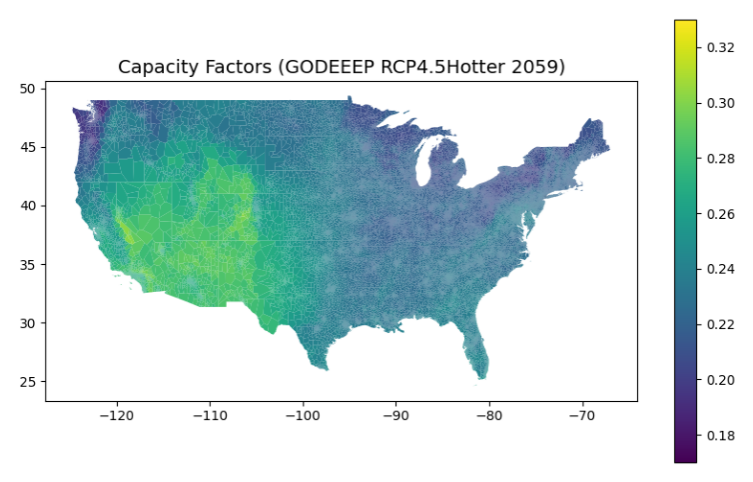

In [15]:


# Load all JPEG files in sorted order (adjust the path if needed)
image_files = sorted(glob.glob("/Users/asiazhang/OneDrive - Stanford/Lab/plots/*.png"))  # Adjust folder and file pattern

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis("off")  # Hide axes
img = plt.imshow(plt.imread(image_files[0]))  # Load the first image

# Update function for animation
def update(frame):
    img.set_array(plt.imread(image_files[frame]))  # Change image

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(image_files), interval=500, repeat=True)
ani.save("/Users/asiazhang/OneDrive - Stanford/Lab/plots/capacity_factors.gif", writer="pillow", fps=0.5) 

plt.show()
